## Feature selction

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False) # 마이너스 부호가 보일수 있게 하겠다
# pd.options.display.max_columns = None
df = pd.read_csv('./csv/수명주기붙힌거공백제거v3.csv',encoding="cp949")
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df

,회사명,거래소코드,회계년도,이자보상배율,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,...,매출원가감소율여부,배당금감소율여부,변화율여부,직원감소율여부,자본증가율여부,투자활동감소율여부,기업수명주기,통계청한국표준산업분류10차(세세분류),회생기업1,회생기업2
0,(주)CMG제약,58820,201112,3.53,1.98,-5.90,17.64,-2.02,56.40,41.83,...,1,0,0,0,0,0,1,의약품제조업,0,0
1,(주)디아크,78590,201112,10.43,13.04,1.71,35.94,29.14,47.52,14.36,...,0,0,0,0,0,0,4,그외자동차용신품부품제조업,0,0
2,(주)옵트론텍,82210,201112,2.39,3.11,0.01,4.78,21.79,-6.84,21.81,...,0,0,0,0,0,1,3,사진장비및광학기기제조업,0,0
3,상신이디피(주),91580,201112,6.82,11.97,19.54,3.13,20.61,37.83,14.77,...,0,0,0,0,0,0,2,축전지제조업,0,0
4,(주)오픈베이스,49480,201112,4.26,1.83,-0.28,4.69,3.74,38.02,22.83,...,0,0,0,0,0,0,2,컴퓨터시스템통합자문및구축서비스업,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,(주)에스에이엠티,31330,201912,14.78,-11.14,-7.71,-20.47,11.28,3.22,4.21,...,0,0,0,0,0,0,3,수송용운송장비도매업,0,1
8744,에스디엔(주),99220,201912,1.17,15.14,29.09,23.35,13.58,6.79,26.67,...,0,0,0,0,0,1,2,수송용운송장비도매업,0,0
8745,(주)에스에이티,60540,201912,11.61,9.86,-0.54,17.31,9.02,4.65,16.69,...,0,0,0,0,0,0,2,기기용자동측정및제어장치제조업,0,1
8746,(주)에스비에스,34120,201912,1.97,30.29,2.62,45.27,13.83,-10.54,19.61,...,0,1,0,0,0,0,5,지상파방송업,0,1


### 3년 으로 나누기

In [4]:
df = df.sort_values(by='회계년도')
df = df.reset_index(drop=True)
df_2011 = df.loc[:2651]
df_2012 = df.loc[862:3596]
df_2012 = df_2012.reset_index(drop=True)
df_2013 = df.loc[1742:4590]
df_2013 = df_2013.reset_index(drop=True)
df_2014 = df.loc[2652:5610]
df_2014 = df_2014.reset_index(drop=True)
df_2015 = df.loc[3597:6656]
df_2015 = df_2015.reset_index(drop=True)
df_2016 = df.loc[4591:7702]
df_2016 = df_2016.reset_index(drop=True)
df_2017 = df.loc[5611:]
df_2017 = df_2017.reset_index(drop=True)

### 결측치 확인

<AxesSubplot:>

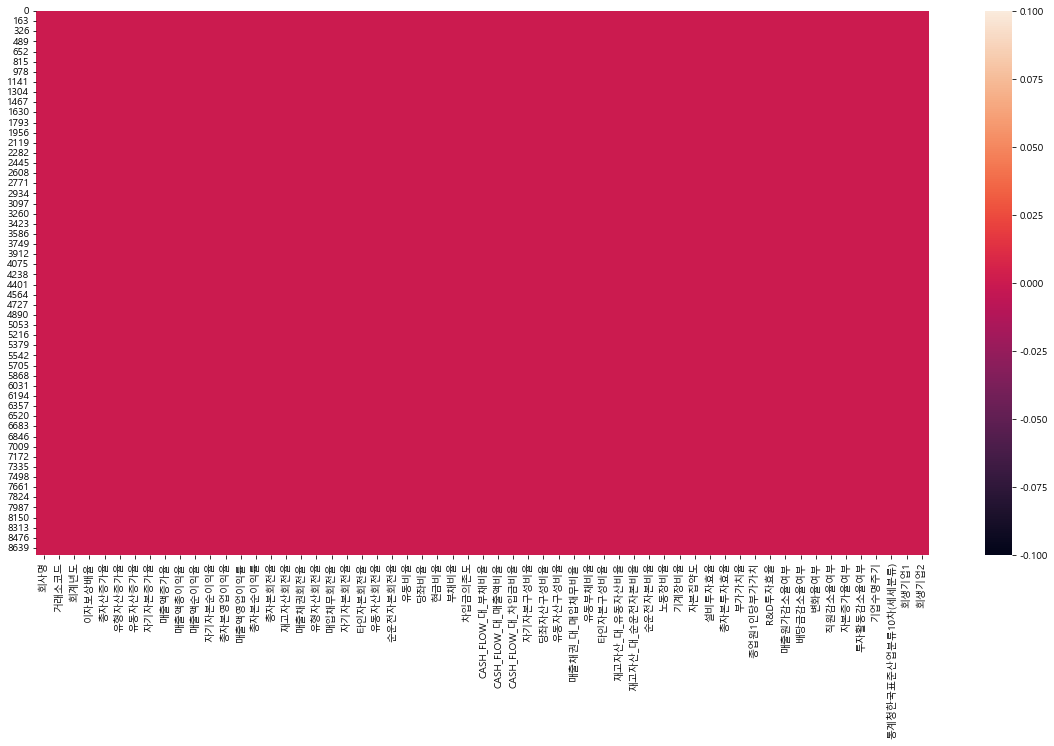

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)
plt.figure(figsize=(20,10))

sns.heatmap(df.isna())

## 이상치 확인

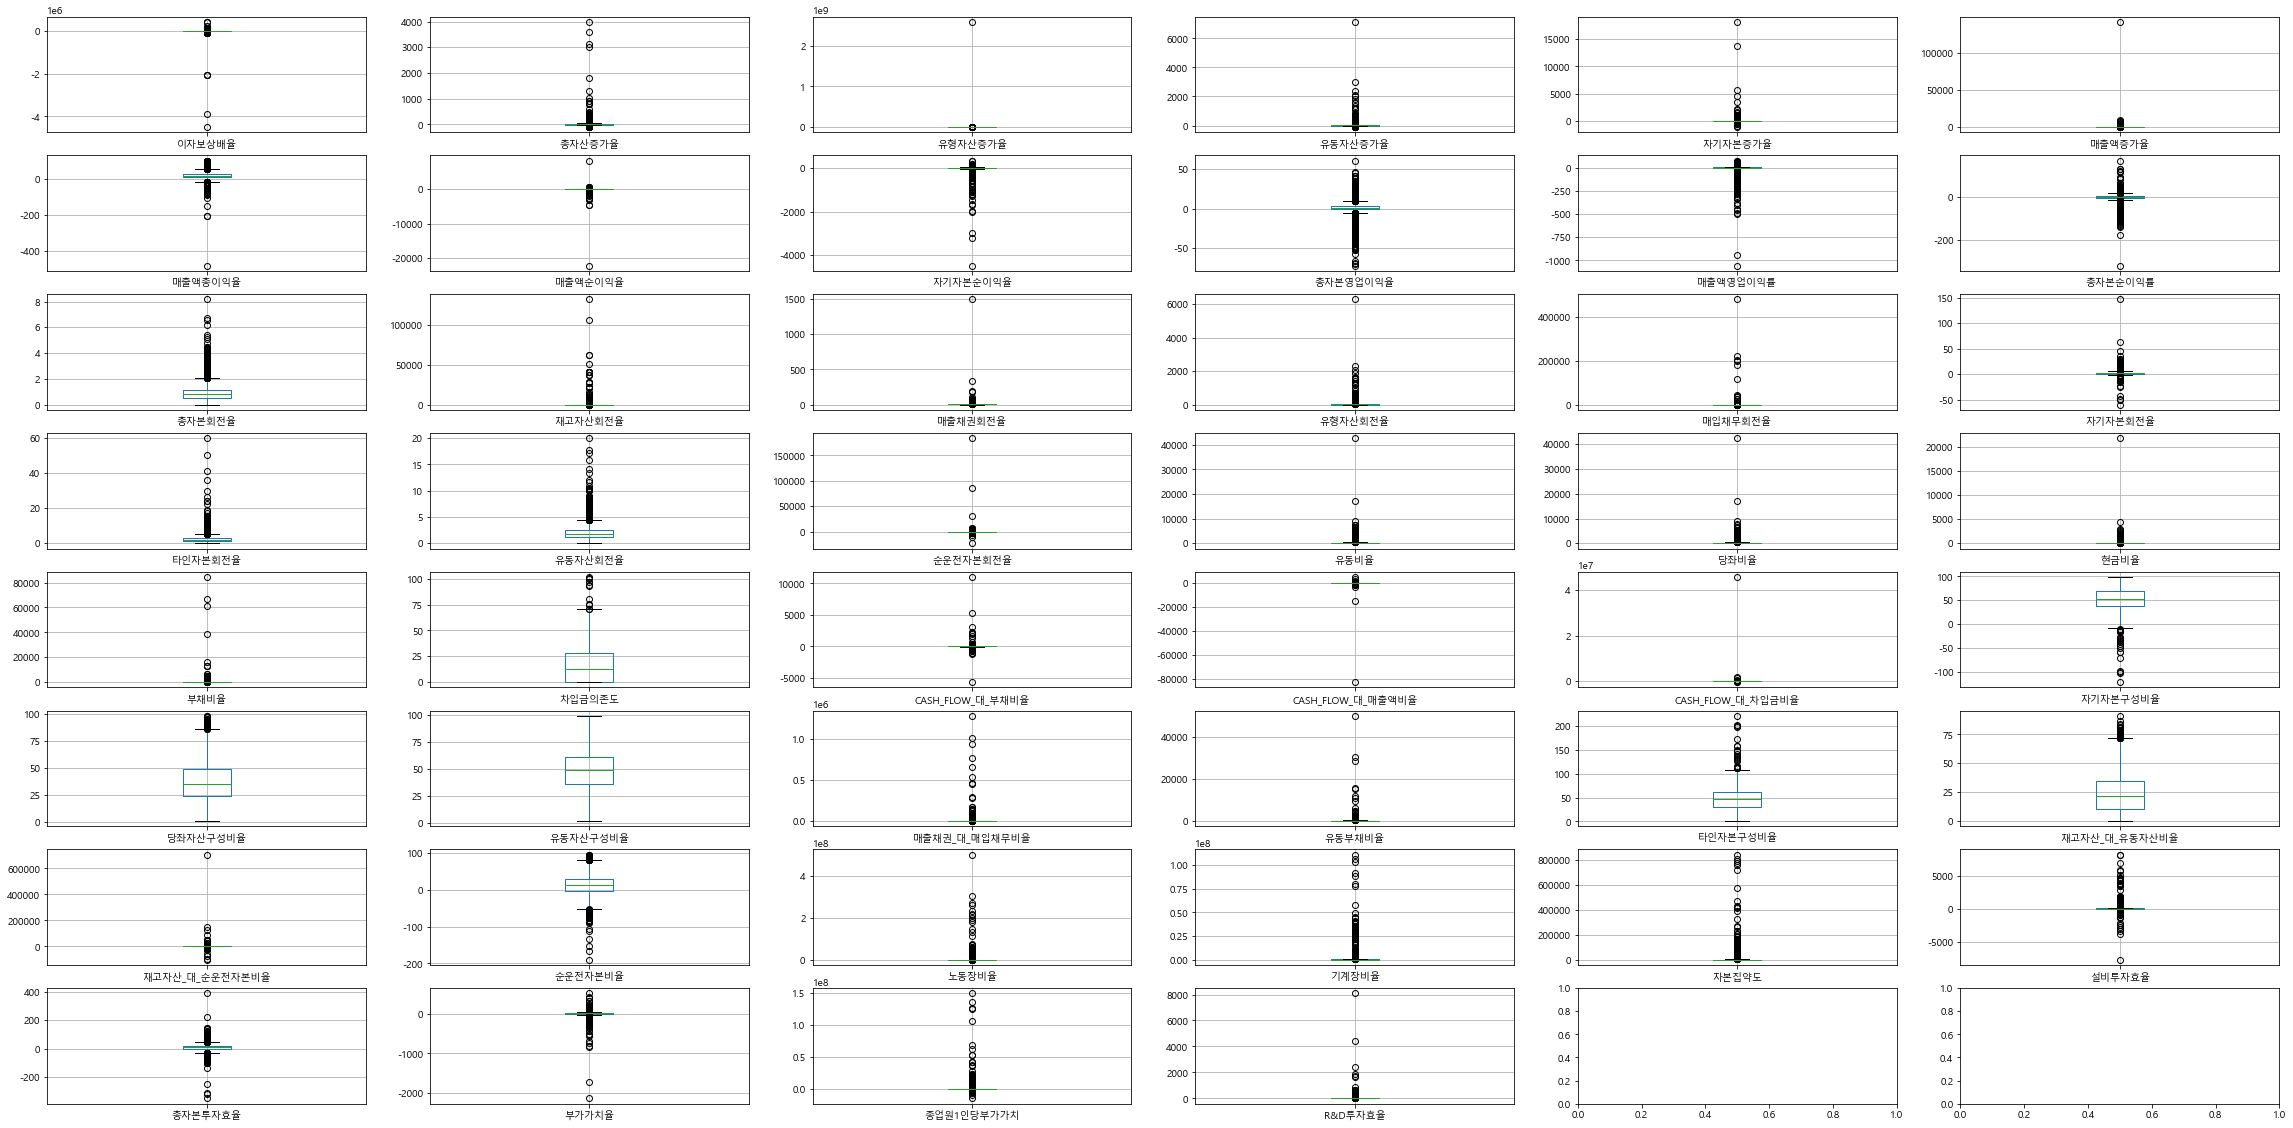

In [7]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df.boxplot(column='이자보상배율', ax=axes[0,0])
df.boxplot(column='총자산증가율', ax=axes[0,1])
df.boxplot(column='유형자산증가율', ax=axes[0,2])
df.boxplot(column='유동자산증가율', ax=axes[0,3])
df.boxplot(column='자기자본증가율', ax=axes[0,4])
df.boxplot(column='매출액증가율', ax=axes[0,5])
df.boxplot(column='매출액총이익율', ax=axes[1,0])
df.boxplot(column='매출액순이익율', ax=axes[1,1])
df.boxplot(column='자기자본순이익율', ax=axes[1,2])
df.boxplot(column='총자본영업이익율', ax=axes[1,3])
df.boxplot(column='매출액영업이익률', ax=axes[1,4])
df.boxplot(column='총자본순이익률', ax=axes[1,5])
df.boxplot(column='총자본회전율', ax=axes[2,0])
df.boxplot(column='재고자산회전율', ax=axes[2,1])
df.boxplot(column='매출채권회전율', ax=axes[2,2])
df.boxplot(column='유형자산회전율', ax=axes[2,3])
df.boxplot(column='매입채무회전율', ax=axes[2,4])
df.boxplot(column='자기자본회전율', ax=axes[2,5])
df.boxplot(column='타인자본회전율', ax=axes[3,0])
df.boxplot(column='유동자산회전율', ax=axes[3,1])
df.boxplot(column='순운전자본회전율', ax=axes[3,2])
df.boxplot(column='유동비율', ax=axes[3,3])
df.boxplot(column='당좌비율', ax=axes[3,4])
df.boxplot(column='현금비율', ax=axes[3,5])
df.boxplot(column='부채비율', ax=axes[4,0])
df.boxplot(column='차입금의존도', ax=axes[4,1])
df.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df.boxplot(column='자기자본구성비율', ax=axes[4,5])
df.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df.boxplot(column='유동자산구성비율', ax=axes[5,1])
df.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df.boxplot(column='유동부채비율', ax=axes[5,3])
df.boxplot(column='타인자본구성비율', ax=axes[5,4])
df.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df.boxplot(column='순운전자본비율', ax=axes[6,1])
df.boxplot(column='노동장비율', ax=axes[6,2])
df.boxplot(column='기계장비율', ax=axes[6,3])
df.boxplot(column='자본집약도', ax=axes[6,4])
df.boxplot(column='설비투자효율', ax=axes[6,5])
df.boxplot(column='총자본투자효율', ax=axes[7,0])
df.boxplot(column='부가가치율', ax=axes[7,1])
df.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df.boxplot(column='R&D투자효율', ax=axes[7,3])

plt.show()

### q-q plot 확인

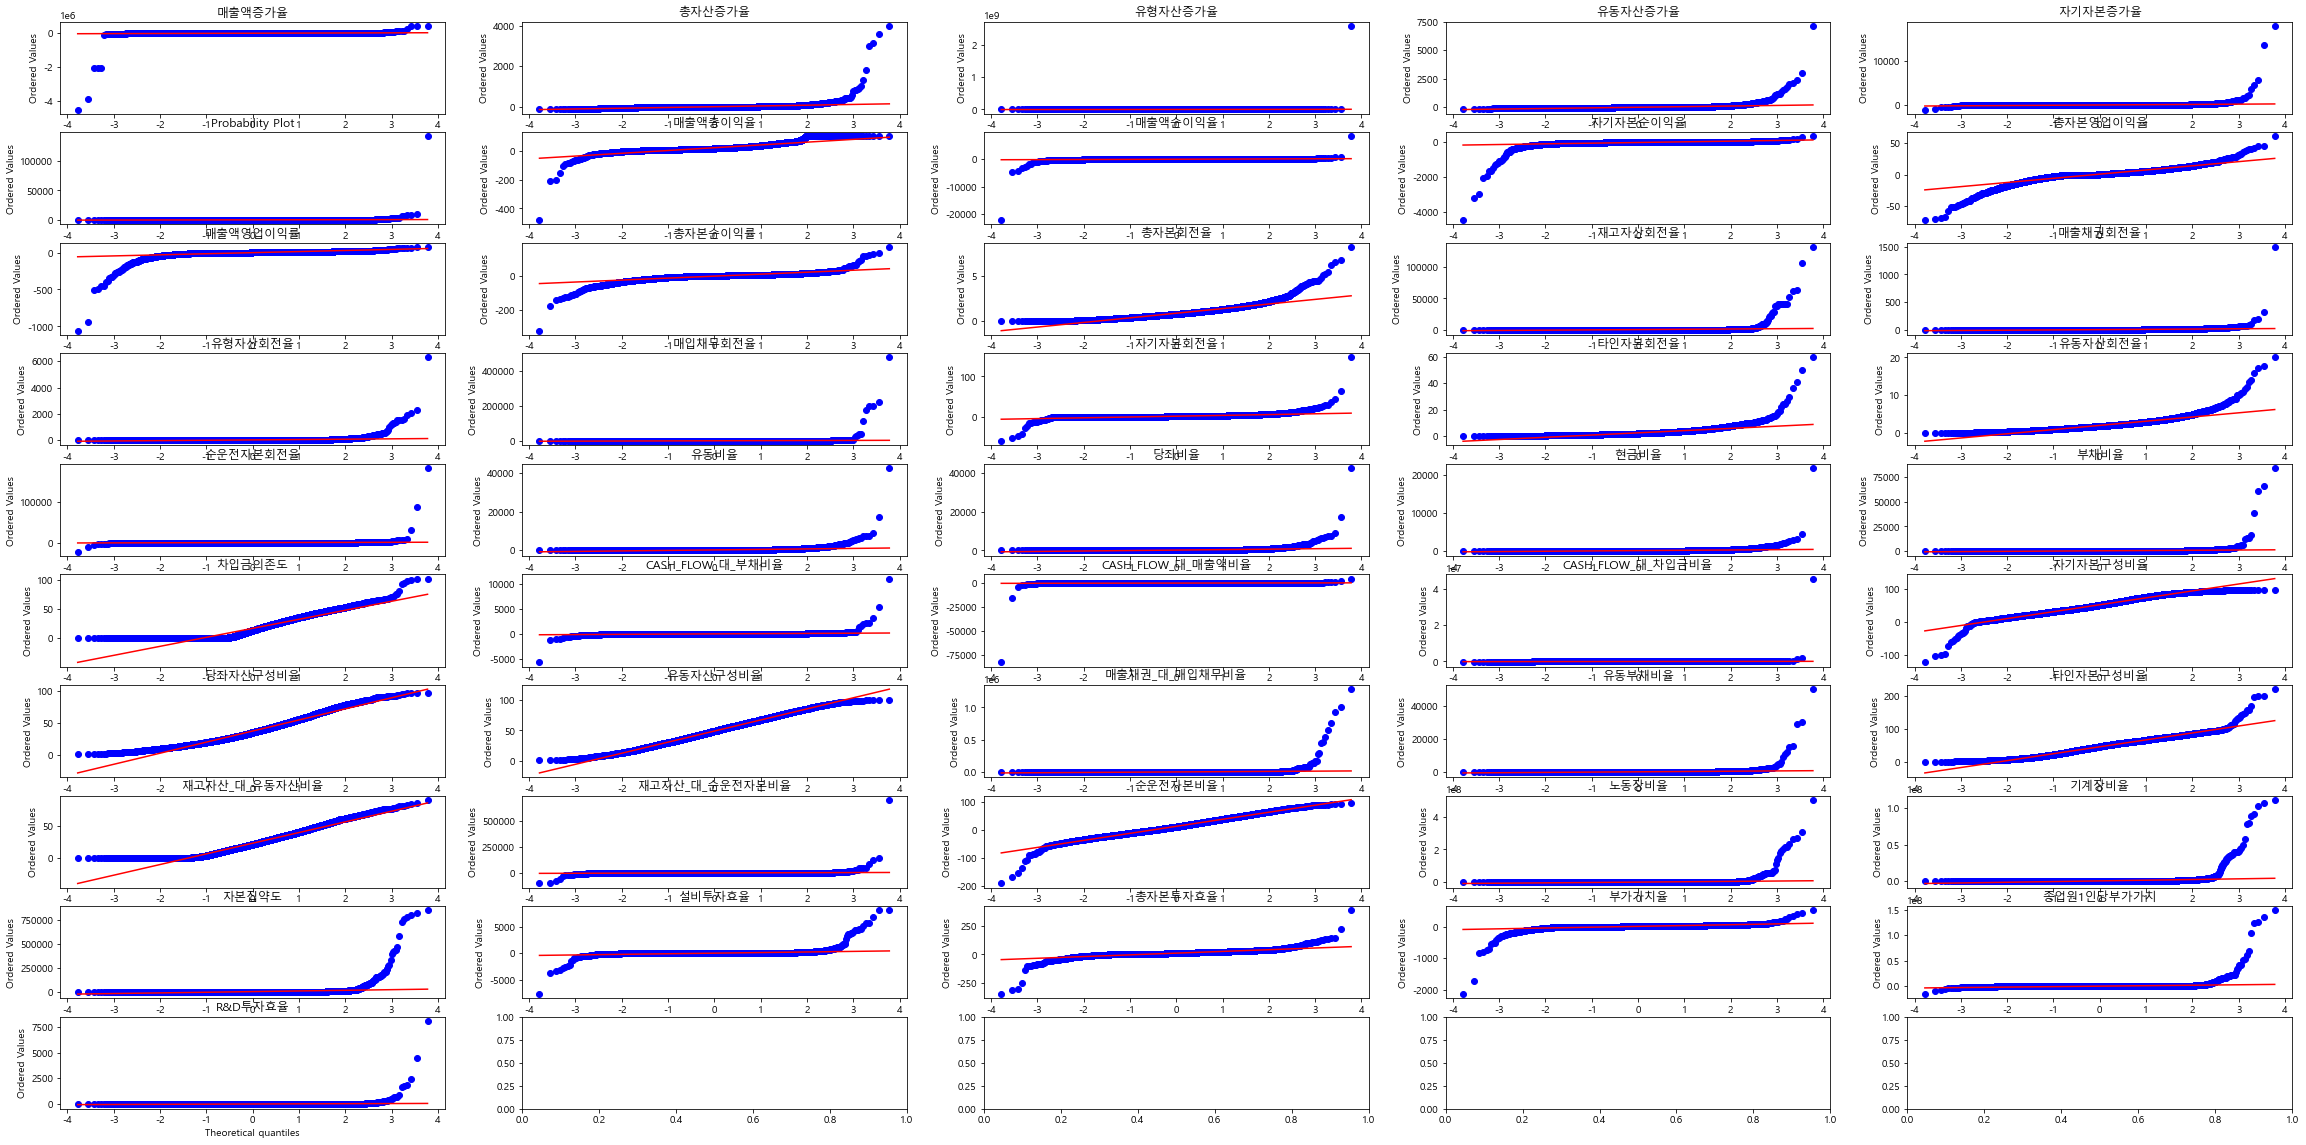

In [15]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10,5)
fig.set_size_inches((40,20))

stats.probplot(df['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(df['R&D투자효율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("R&D투자효율")

plt.show()

## 이상치 조정

winsorize 하기

In [8]:
from scipy.stats.mstats import winsorize
df1 = df.copy()
for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.025)

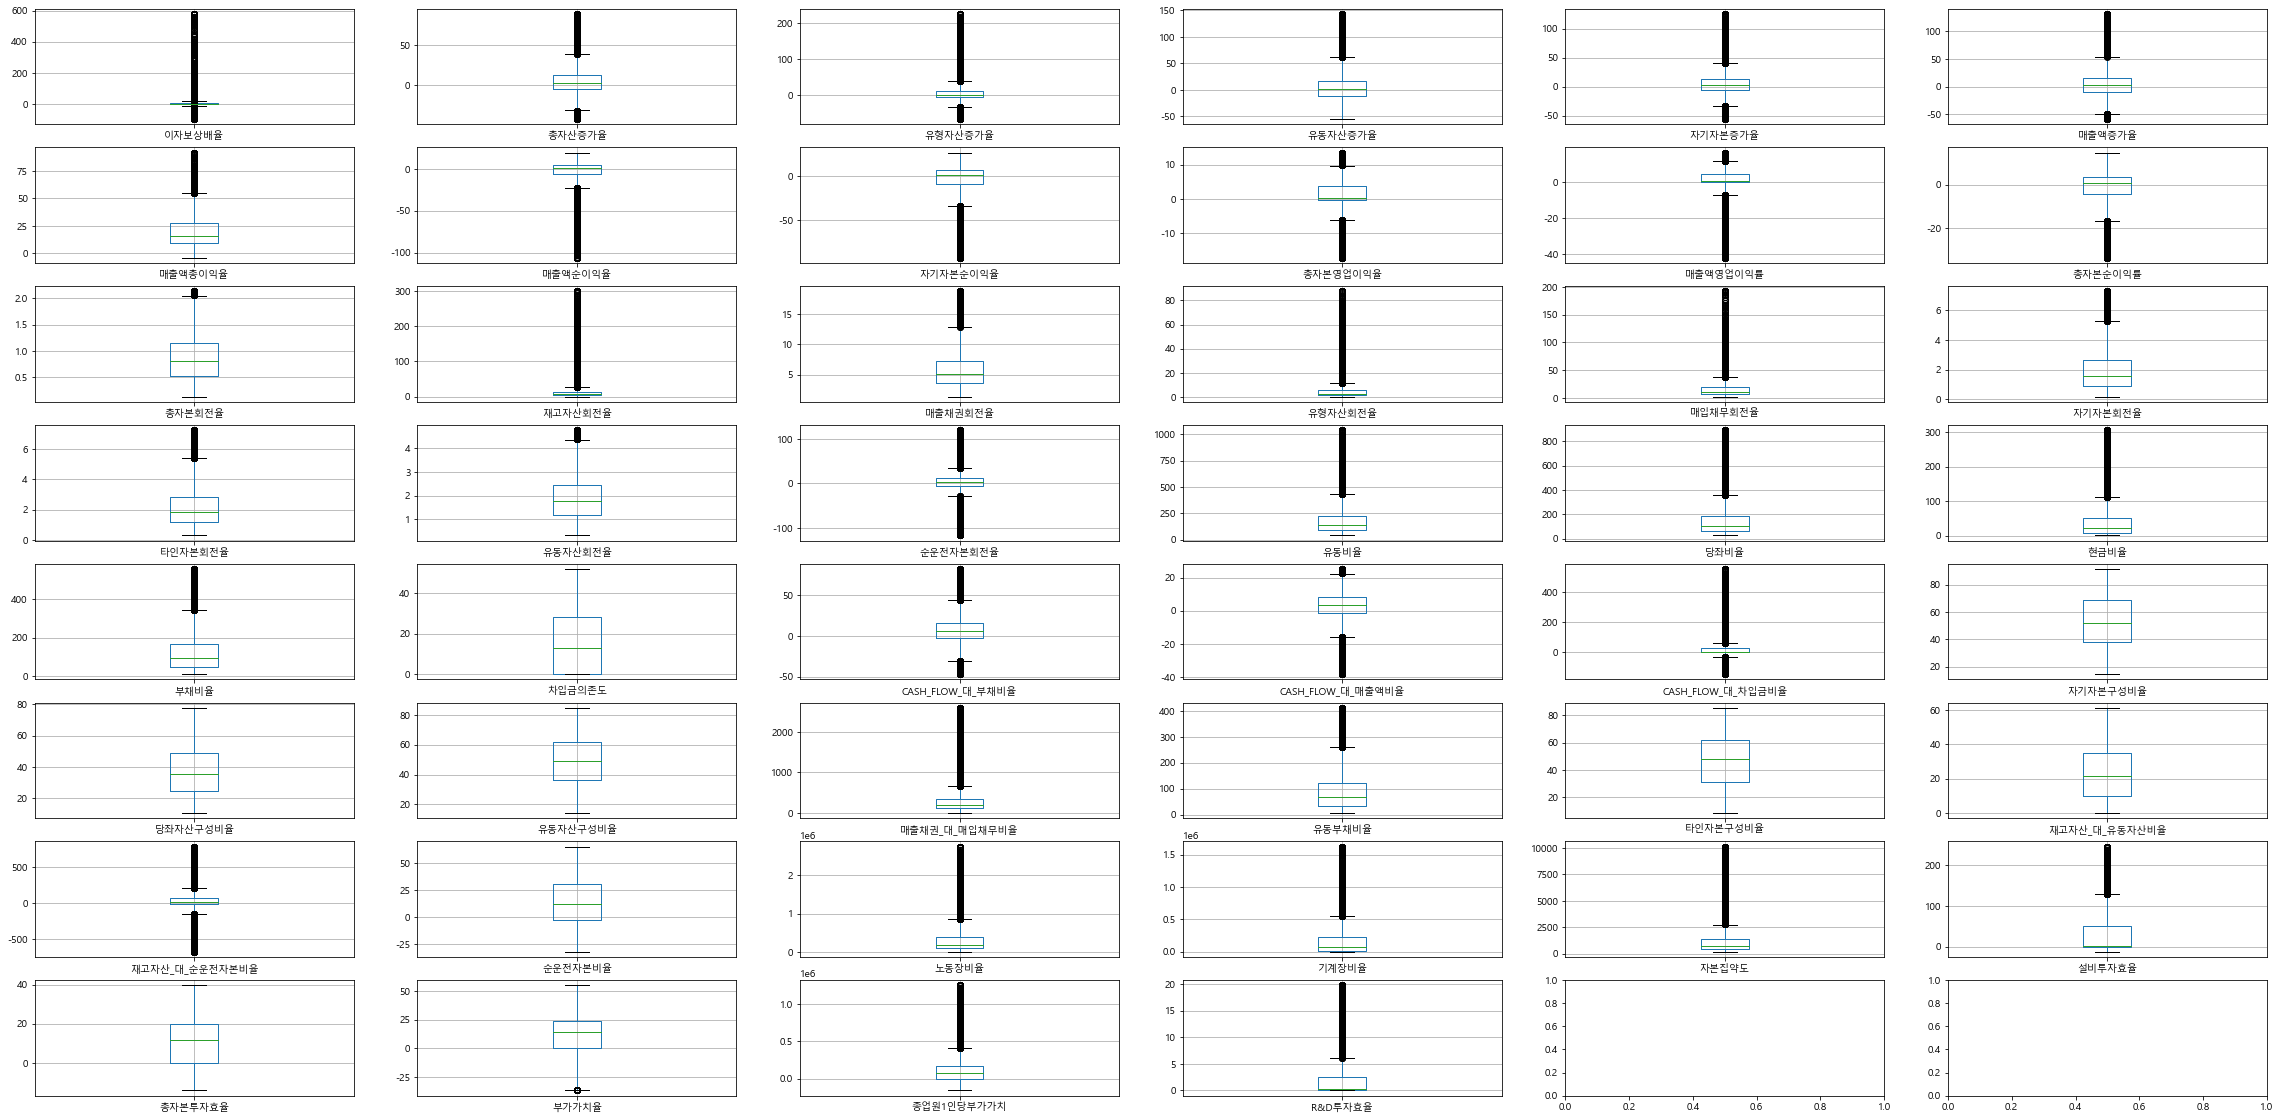

In [14]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(8, 6)
fig.set_size_inches((40,20))

df1.boxplot(column='이자보상배율', ax=axes[0,0])
df1.boxplot(column='총자산증가율', ax=axes[0,1])
df1.boxplot(column='유형자산증가율', ax=axes[0,2])
df1.boxplot(column='유동자산증가율', ax=axes[0,3])
df1.boxplot(column='자기자본증가율', ax=axes[0,4])
df1.boxplot(column='매출액증가율', ax=axes[0,5])
df1.boxplot(column='매출액총이익율', ax=axes[1,0])
df1.boxplot(column='매출액순이익율', ax=axes[1,1])
df1.boxplot(column='자기자본순이익율', ax=axes[1,2])
df1.boxplot(column='총자본영업이익율', ax=axes[1,3])
df1.boxplot(column='매출액영업이익률', ax=axes[1,4])
df1.boxplot(column='총자본순이익률', ax=axes[1,5])
df1.boxplot(column='총자본회전율', ax=axes[2,0])
df1.boxplot(column='재고자산회전율', ax=axes[2,1])
df1.boxplot(column='매출채권회전율', ax=axes[2,2])
df1.boxplot(column='유형자산회전율', ax=axes[2,3])
df1.boxplot(column='매입채무회전율', ax=axes[2,4])
df1.boxplot(column='자기자본회전율', ax=axes[2,5])
df1.boxplot(column='타인자본회전율', ax=axes[3,0])
df1.boxplot(column='유동자산회전율', ax=axes[3,1])
df1.boxplot(column='순운전자본회전율', ax=axes[3,2])
df1.boxplot(column='유동비율', ax=axes[3,3])
df1.boxplot(column='당좌비율', ax=axes[3,4])
df1.boxplot(column='현금비율', ax=axes[3,5])
df1.boxplot(column='부채비율', ax=axes[4,0])
df1.boxplot(column='차입금의존도', ax=axes[4,1])
df1.boxplot(column='CASH_FLOW_대_부채비율', ax=axes[4,2])
df1.boxplot(column='CASH_FLOW_대_매출액비율', ax=axes[4,3])
df1.boxplot(column='CASH_FLOW_대_차입금비율', ax=axes[4,4])
df1.boxplot(column='자기자본구성비율', ax=axes[4,5])
df1.boxplot(column='당좌자산구성비율', ax=axes[5,0])
df1.boxplot(column='유동자산구성비율', ax=axes[5,1])
df1.boxplot(column='매출채권_대_매입채무비율', ax=axes[5,2])
df1.boxplot(column='유동부채비율', ax=axes[5,3])
df1.boxplot(column='타인자본구성비율', ax=axes[5,4])
df1.boxplot(column='재고자산_대_유동자산비율', ax=axes[5,5])
df1.boxplot(column='재고자산_대_순운전자본비율', ax=axes[6,0])
df1.boxplot(column='순운전자본비율', ax=axes[6,1])
df1.boxplot(column='노동장비율', ax=axes[6,2])
df1.boxplot(column='기계장비율', ax=axes[6,3])
df1.boxplot(column='자본집약도', ax=axes[6,4])
df1.boxplot(column='설비투자효율', ax=axes[6,5])
df1.boxplot(column='총자본투자효율', ax=axes[7,0])
df1.boxplot(column='부가가치율', ax=axes[7,1])
df1.boxplot(column='종업원1인당부가가치', ax=axes[7,2])
df1.boxplot(column='R&D투자효율', ax=axes[7,3])

plt.show()

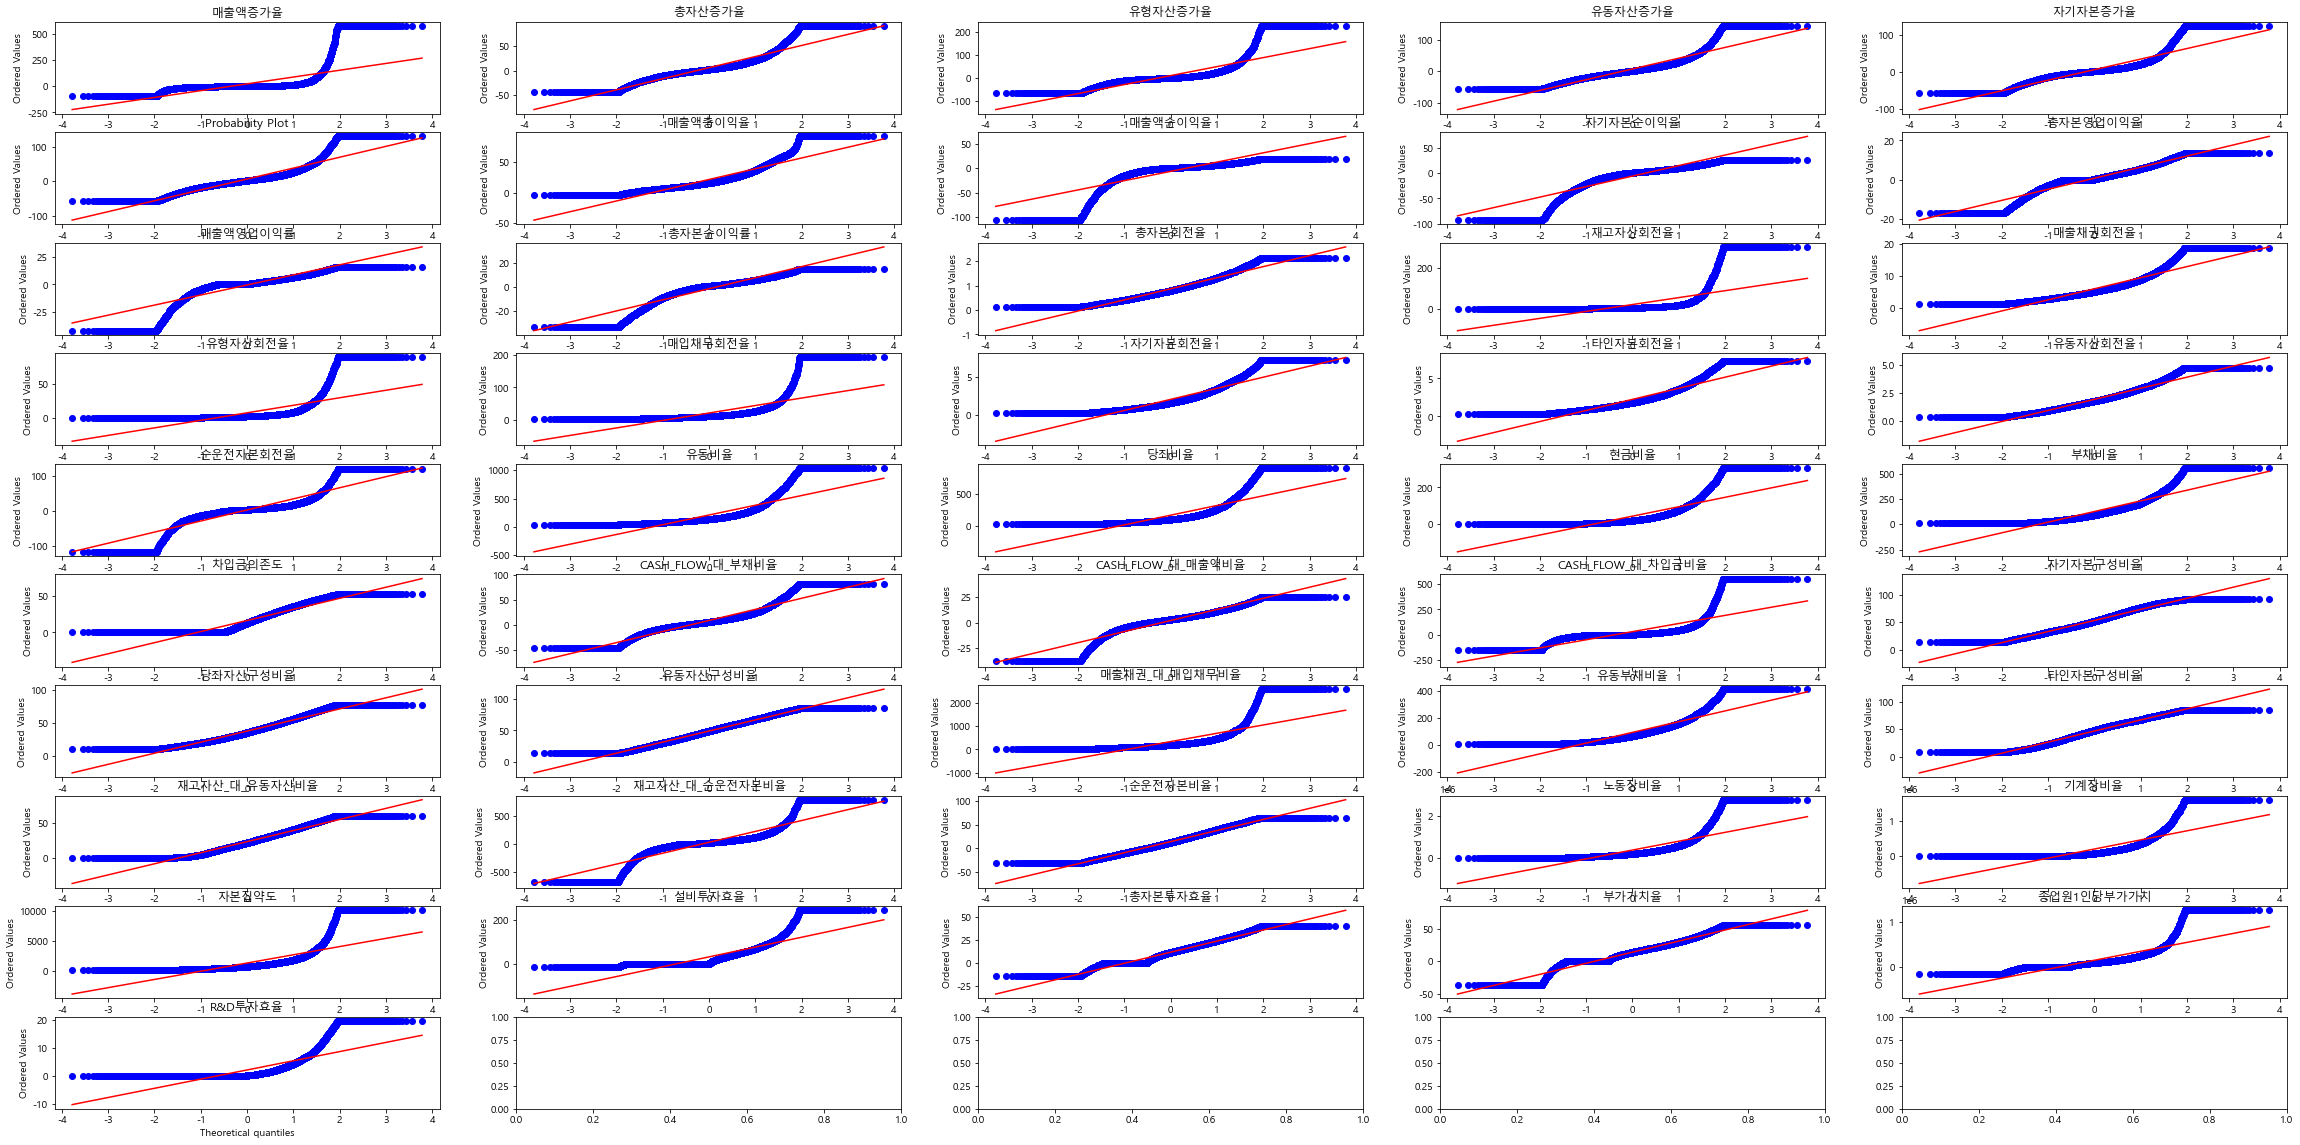

In [12]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(10,5)
fig.set_size_inches((40,20))

stats.probplot(df1['이자보상배율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("이자보상배율")
stats.probplot(df1['총자산증가율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("총자산증가율")
stats.probplot(df1['유형자산증가율'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("유형자산증가율")
stats.probplot(df1['유동자산증가율'],dist=stats.norm,plot=axes[0,3])
axes[0,3].title.set_text("유동자산증가율")
stats.probplot(df1['자기자본증가율'],dist=stats.norm,plot=axes[0,4])
axes[0,4].title.set_text("자기자본증가율")
stats.probplot(df1['매출액증가율'],dist=stats.norm,plot=axes[1,0])
axes[0,0].title.set_text("매출액증가율")
stats.probplot(df1['매출액총이익율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("매출액총이익율")
stats.probplot(df1['매출액순이익율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("매출액순이익율")
stats.probplot(df1['자기자본순이익율'],dist=stats.norm,plot=axes[1,3])
axes[1,3].title.set_text("자기자본순이익율")
stats.probplot(df1['총자본영업이익율'],dist=stats.norm,plot=axes[1,4])
axes[1,4].title.set_text("총자본영업이익율")
stats.probplot(df1['매출액영업이익률'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("매출액영업이익률")
stats.probplot(df1['총자본순이익률'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("총자본순이익률")
stats.probplot(df1['총자본회전율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("총자본회전율")
stats.probplot(df1['재고자산회전율'],dist=stats.norm,plot=axes[2,3])
axes[2,3].title.set_text("재고자산회전율")
stats.probplot(df1['매출채권회전율'],dist=stats.norm,plot=axes[2,4])
axes[2,4].title.set_text("매출채권회전율")
stats.probplot(df1['유형자산회전율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("유형자산회전율")
stats.probplot(df1['매입채무회전율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("매입채무회전율")
stats.probplot(df1['자기자본회전율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("자기자본회전율")
stats.probplot(df1['타인자본회전율'],dist=stats.norm,plot=axes[3,3])
axes[3,3].title.set_text("타인자본회전율")
stats.probplot(df1['유동자산회전율'],dist=stats.norm,plot=axes[3,4])
axes[3,4].title.set_text("유동자산회전율")
stats.probplot(df1['순운전자본회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("순운전자본회전율")
stats.probplot(df1['유동비율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유동비율")
stats.probplot(df1['당좌비율'],dist=stats.norm,plot=axes[4,2])
axes[4,2].title.set_text("당좌비율")
stats.probplot(df1['현금비율'],dist=stats.norm,plot=axes[4,3])
axes[4,3].title.set_text("현금비율")
stats.probplot(df1['부채비율'],dist=stats.norm,plot=axes[4,4])
axes[4,4].title.set_text("부채비율")
stats.probplot(df1['차입금의존도'],dist=stats.norm,plot=axes[5,0])
axes[5,0].title.set_text("차입금의존도")
stats.probplot(df1['CASH_FLOW_대_부채비율'],dist=stats.norm,plot=axes[5,1])
axes[5,1].title.set_text("CASH_FLOW_대_부채비율")
stats.probplot(df1['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[5,2])
axes[5,2].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(df1['CASH_FLOW_대_차입금비율'],dist=stats.norm,plot=axes[5,3])
axes[5,3].title.set_text("CASH_FLOW_대_차입금비율")
stats.probplot(df1['자기자본구성비율'],dist=stats.norm,plot=axes[5,4])
axes[5,4].title.set_text("자기자본구성비율")
stats.probplot(df1['당좌자산구성비율'],dist=stats.norm,plot=axes[6,0])
axes[6,0].title.set_text("당좌자산구성비율")
stats.probplot(df1['유동자산구성비율'],dist=stats.norm,plot=axes[6,1])
axes[6,1].title.set_text("유동자산구성비율")
stats.probplot(df1['매출채권_대_매입채무비율'],dist=stats.norm,plot=axes[6,2])
axes[6,2].title.set_text("매출채권_대_매입채무비율")
stats.probplot(df1['유동부채비율'],dist=stats.norm,plot=axes[6,3])
axes[6,3].title.set_text("유동부채비율")
stats.probplot(df1['타인자본구성비율'],dist=stats.norm,plot=axes[6,4])
axes[6,4].title.set_text("타인자본구성비율")
stats.probplot(df1['재고자산_대_유동자산비율'],dist=stats.norm,plot=axes[7,0])
axes[7,0].title.set_text("재고자산_대_유동자산비율")
stats.probplot(df1['재고자산_대_순운전자본비율'],dist=stats.norm,plot=axes[7,1])
axes[7,1].title.set_text("재고자산_대_순운전자본비율")
stats.probplot(df1['순운전자본비율'],dist=stats.norm,plot=axes[7,2])
axes[7,2].title.set_text("순운전자본비율")
stats.probplot(df1['노동장비율'],dist=stats.norm,plot=axes[7,3])
axes[7,3].title.set_text("노동장비율")
stats.probplot(df1['기계장비율'],dist=stats.norm,plot=axes[7,4])
axes[7,4].title.set_text("기계장비율")
stats.probplot(df1['자본집약도'],dist=stats.norm,plot=axes[8,0])
axes[8,0].title.set_text("자본집약도")
stats.probplot(df1['설비투자효율'],dist=stats.norm,plot=axes[8,1])
axes[8,1].title.set_text("설비투자효율")
stats.probplot(df1['총자본투자효율'],dist=stats.norm,plot=axes[8,2])
axes[8,2].title.set_text("총자본투자효율")
stats.probplot(df1['부가가치율'],dist=stats.norm,plot=axes[8,3])
axes[8,3].title.set_text("부가가치율")
stats.probplot(df1['종업원1인당부가가치'],dist=stats.norm,plot=axes[8,4])
axes[8,4].title.set_text("종업원1인당부가가치")
stats.probplot(df1['R&D투자효율'],dist=stats.norm,plot=axes[9,0])
axes[9,0].title.set_text("R&D투자효율")

plt.show()

### 정규화 전 데이터 나누기

In [34]:
x = df1[['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']]
y = df1['회생기업2']

### Standard Scaling 하기

In [35]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
ss_sc = SS.fit_transform(x)
ss_sc2 = pd.DataFrame(ss_sc)

In [36]:
ss_sc2.columns = ['총자산증가율', '유형자산증가율', '유동자산증가율',
       '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율', '총자본영업이익율',
       '매출액영업이익률', '총자본순이익률', '총자본회전율', '재고자산회전율', '매출채권회전율', '유형자산회전율',
       '매입채무회전율', '자기자본회전율', '타인자본회전율', '유동자산회전율', '순운전자본회전율', '유동비율', '당좌비율',
       '현금비율', '부채비율', '차입금의존도', 'CASH_FLOW_대_부채비율', 'CASH_FLOW_대_매출액비율',
       'CASH_FLOW_대_차입금비율', '자기자본구성비율', '당좌자산구성비율', '유동자산구성비율',
       '매출채권_대_매입채무비율', '유동부채비율', '타인자본구성비율', '재고자산_대_유동자산비율',
       '재고자산_대_순운전자본비율', '순운전자본비율', '노동장비율', '기계장비율', '자본집약도', '설비투자효율',
       '총자본투자효율', '부가가치율', '종업원1인당부가가치', 'R&D투자효율']

In [37]:
ss_sc2

,총자산증가율,유형자산증가율,유동자산증가율,자기자본증가율,매출액증가율,매출액총이익율,매출액순이익율,자기자본순이익율,총자본영업이익율,매출액영업이익률,...,재고자산_대_순운전자본비율,순운전자본비율,노동장비율,기계장비율,자본집약도,설비투자효율,총자본투자효율,부가가치율,종업원1인당부가가치,R&D투자효율
0,-0.162665,-0.340061,0.276222,-0.286783,1.453725,1.066276,-0.097828,-0.120052,0.271233,0.387377,...,0.036785,0.591163,-0.551248,-0.514334,-0.617538,0.040186,0.094414,0.328715,-0.470077,-0.496033
1,-0.476293,-0.225955,-0.842949,-0.201170,-0.778702,-0.739376,0.236455,0.170254,-0.127962,0.046370,...,-0.320892,-1.137598,1.210141,0.015091,0.226134,-0.070181,0.474485,-0.029188,0.675826,-0.388581
2,-0.763925,-0.130240,-0.775450,-1.012909,-0.642482,0.910058,-0.093162,-0.502881,-0.131360,0.044470,...,0.578991,-0.190084,-0.610795,-0.551238,-0.559346,-0.632254,-0.952015,-0.800411,-0.575092,-0.526399
3,1.237761,0.227124,0.617797,-0.743069,-0.208391,-0.873650,0.045981,-0.493544,-0.620586,-0.242393,...,-0.633814,-1.544216,-0.218875,-0.388298,-0.268684,-0.632254,-0.512712,-0.429231,-0.389906,-0.526399
4,1.818057,2.956671,0.126255,0.859165,1.683486,-0.232059,0.326813,0.335354,0.446199,0.361730,...,0.418046,-0.009504,-0.520762,-0.502738,-0.337495,1.777425,0.339568,0.265794,-0.112463,-0.526399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,0.416374,1.298170,0.202463,0.439026,1.068158,0.035968,0.721759,1.156613,1.693046,1.190975,...,0.749224,0.357547,-0.494580,-0.589260,-0.324433,2.647856,1.022380,0.870188,0.155544,0.207075
8744,-0.181952,-0.266916,-0.111623,0.271922,0.168990,-0.739376,0.212699,-0.094586,0.295014,0.266742,...,-0.692273,-1.289133,-0.073389,0.085881,-0.306813,0.106036,0.419367,0.103005,-0.045306,-0.526399
8745,-0.490129,-0.139018,1.428325,0.015083,-0.547187,-0.682427,0.342509,0.441036,-0.343697,-0.041019,...,0.080675,0.886656,-0.240960,-0.475859,-0.084525,0.432279,-0.014178,-0.339178,-0.020775,-0.484353
8746,-0.054069,-0.116029,-0.078418,-0.363518,-1.032141,-0.583157,-0.189459,0.086642,-0.216295,-0.258541,...,-0.188676,-1.164116,3.108641,-0.601278,0.575598,-0.513810,-0.511890,1.228668,-0.047308,-0.526399


### 샤피로

In [38]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [39]:
shap_pct(ss_sc2)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
매출액영업이익률 의 pvalue: 0.0
총자본순이익률 의 pvalue: 0.0
총자본회전율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
당좌비율 의 pvalue: 0.0
현금비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
자기자본구성비율 의 pvalue: 6.791836463383285e-35
당좌자산구성비율 의 pvalue: 2.7171177223258203e-42
유동자산구성비율 의 pvalue: 4.100951482579253e-28
매출채권_대_매입채무비율 의 pvalue: 0.0
유동부채비율 의 pvalue: 0.0
타인자본구성비율 의 pvalue: 6.820288248036733e-35
재고자산_대_유동자산비율 의 pvalue: 8.407790785948902e-45
재고자산_대_순운전자본비율 의 pvalue: 0.0
순운전자본비율 의 pvalue: 2.5610871955715633e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 상관분석 및 다중공선성 확인

#### heatmap 보기

C:\Users\82104\AppData\Local\Temp\ipykernel_3780\187613899.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(ss_sc2_corr, dtype=np.bool))


<AxesSubplot:>

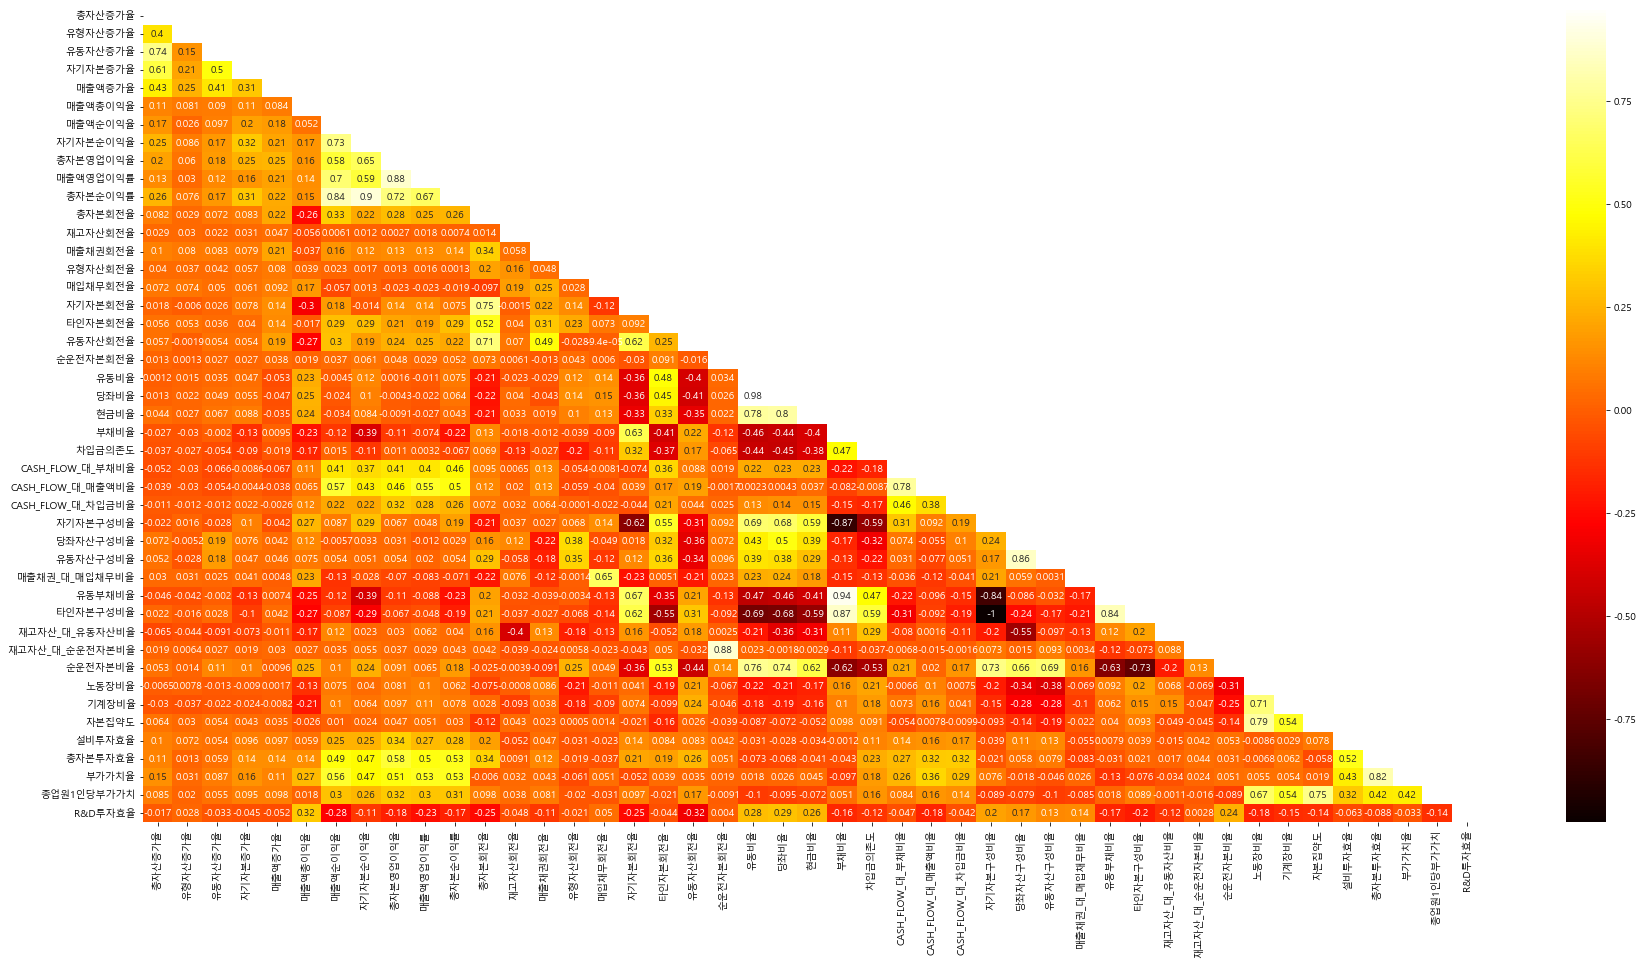

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="Malgun Gothic") # 시각화 할때 한글이 볼수 있게 하겠다
plt.rc("axes", unicode_minus=False)

ss_sc2_corr = ss_sc2.corr(method='pearson')
mask = np.triu(np.ones_like(ss_sc2_corr, dtype=np.bool))
plt.figure(figsize=(30,15))

sns.heatmap(ss_sc2.corr(),annot=True, cmap='hot',mask=mask)

In [41]:
ss_sc2 = ss_sc2.drop(['매출액영업이익률','총자본순이익률','당좌비율','현금비율','자기자본구성비율',
                      '유동자산구성비율','유동부채비율','타인자본구성비율','재고자산_대_순운전자본비율','자본집약도',
                      '부가가치율','타인자본구성비율','총자본회전율'],axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(ss_sc2,i)for i in range(ss_sc2.shape[1])]
vif['features'] = ss_sc2.columns
# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF_Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF_Factor,features
0,7.993116,순운전자본비율
1,6.406312,당좌자산구성비율
2,5.704965,자기자본회전율
3,4.770637,유동자산회전율
4,4.702945,부채비율
5,3.875596,노동장비율
6,3.793020,CASH_FLOW_대_매출액비율
7,3.692058,자기자본순이익율
8,3.604065,CASH_FLOW_대_부채비율
9,3.438333,총자산증가율


In [43]:
shap_pct(ss_sc2)

총자산증가율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
유동자산증가율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
매출액순이익율 의 pvalue: 0.0
자기자본순이익율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
재고자산회전율 의 pvalue: 0.0
매출채권회전율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0
자기자본회전율 의 pvalue: 0.0
타인자본회전율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
순운전자본회전율 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
부채비율 의 pvalue: 0.0
차입금의존도 의 pvalue: 0.0
CASH_FLOW_대_부채비율 의 pvalue: 0.0
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
CASH_FLOW_대_차입금비율 의 pvalue: 0.0
당좌자산구성비율 의 pvalue: 2.7171177223258203e-42
매출채권_대_매입채무비율 의 pvalue: 0.0
재고자산_대_유동자산비율 의 pvalue: 8.407790785948902e-45
순운전자본비율 의 pvalue: 2.5610871955715633e-29
노동장비율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.0
설비투자효율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 9.010769515147871e-41
종업원1인당부가가치 의 pvalue: 0.0
R&D투자효율 의 pvalue: 0.0


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 회귀분석

In [45]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = y
feature = ss_sc2

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')

# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  회생기업2   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     37.04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.60e-219
Time:                        11:30:41   Log-Likelihood:                -3662.7
No. Observations:                8748   AIC:                             7393.
Df Residuals:                    8714   BIC:                             7634.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1906      0.004     48.366      0.000       0.183       0.198
총자산증가율                0.0002      0.007      0.029      0.977      -0.014       0.015
유형자산증가율              -0.0099      0.005     -2.195      0.028      -0.019      -0.001
유동자산증가율              -0.0008      0.007     -0.119      0.905      -0.014       0.012
자기자본증가율               0.0108      0.006      1.958      0.050   -1.12e-05       0.022
매출액증가율               -0.0185      0.005     -3.911      0.000      -0.028      -0.009
매출액총이익율               0.0108      0.005      2.234      0.026       0.001       0.020
매출액순이익율              -0.0269      0.007     -3.699      0.000      -0.041      -0.013
자기자본순이익율              0.0585      0.008      7.731      0.000       0.044       0.073
총자본영업이익율              0.0768      0.006     12.370      0.000       0.065       0.089
재고자산회전율               0.0020      0.005      0.442      0.658      -0.007       0.011
매출채권회전율              -0.0065      0.005     -1.227      0.220      -0.017       0.004
유형자산회전율               0.0250      0.005      5.467      0.000       0.016       0.034
매입채무회전율               0.0178      0.006      2.975      0.003       0.006       0.029
자기자본회전율              -0.0046      0.009     -0.492      0.623      -0.023       0.014
타인자본회전율               0.0001      0.007      0.015      0.988      -0.014       0.014
유동자산회전율               0.0420      0.009      4.881      0.000       0.025       0.059
순운전자본회전율              0.0035      0.004      0.877      0.381      -0.004       0.011
유동비율                 -0.0263      0.007     -3.691      0.000      -0.040      -0.012
부채비율                  0.0204      0.009      2.387      0.017       0.004       0.037
차입금의존도               -0.0016      0.006     -0.284      0.777      -0.012       0.009
CASH_FLOW_대_부채비율      0.0034      0.007      0.456      0.648      -0.011       0.018
CASH_FLOW_대_매출액비율     0.0253      0.008      3.296      0.001       0.010       0.040
CASH_FLOW_대_차입금비율     0.0023      0.005      0.491      0.623      -0.007       0.012
당좌자산구성비율             -0.0045      0.010     -0.449      0.653      -0.024       0.015
매출채권_대_매입채무비율        -0.0109      0.006     -1.866      0.062      -0.022       0.001
재고자산_대_유동자산비율         0.0036      0.007      0.526      0.599      -0.010       0.017
순운전자본비율               0.0306      0.011      2.746      0.006       0.009       0.052
노동장비율                -0.0127      0.008     -1.636      0.102      -0.028       0.003
기계장비율                 0.0234      0.006      3.878      0.000       0.012       0.035
설비투자효율                0.0089      0.005      1.855      0.064      -0.001       0.018
총자본투자효율              -0.0337      0.007     -5.060      0.000      -0.047      -0.021
종업원1인당부가가치            0.0297      0.007      4.175      0.000       0.016

다행히 다중공선성은 사라졌군...

In [47]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['유형자산증가율', '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본영업이익율', '유형자산회전율', '매입채무회전율', '유동자산회전율', '유동비율', '부채비율',
       'CASH_FLOW_대_매출액비율', '순운전자본비율', '기계장비율', '총자본투자효율','종업원1인당부가가치']])

,VIF Factor,features
0,3.795511,순운전자본비율
1,3.496881,자기자본순이익율
2,3.058957,매출액순이익율
3,2.552202,유동비율
4,2.374158,총자본영업이익율
5,2.060006,부채비율
6,1.894740,종업원1인당부가가치
7,1.886066,총자본투자효율
8,1.762190,기계장비율
9,1.718234,CASH_FLOW_대_매출액비율


### 후진제거법

                            OLS Regression Results                            
Dep. Variable:                  회생기업2   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     67.28
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          8.98e-230
Time:                        13:11:37   Log-Likelihood:                -3668.7
No. Observations:                8748   AIC:                             7375.
Df Residuals:                    8729   BIC:                             7510.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1906      0.00

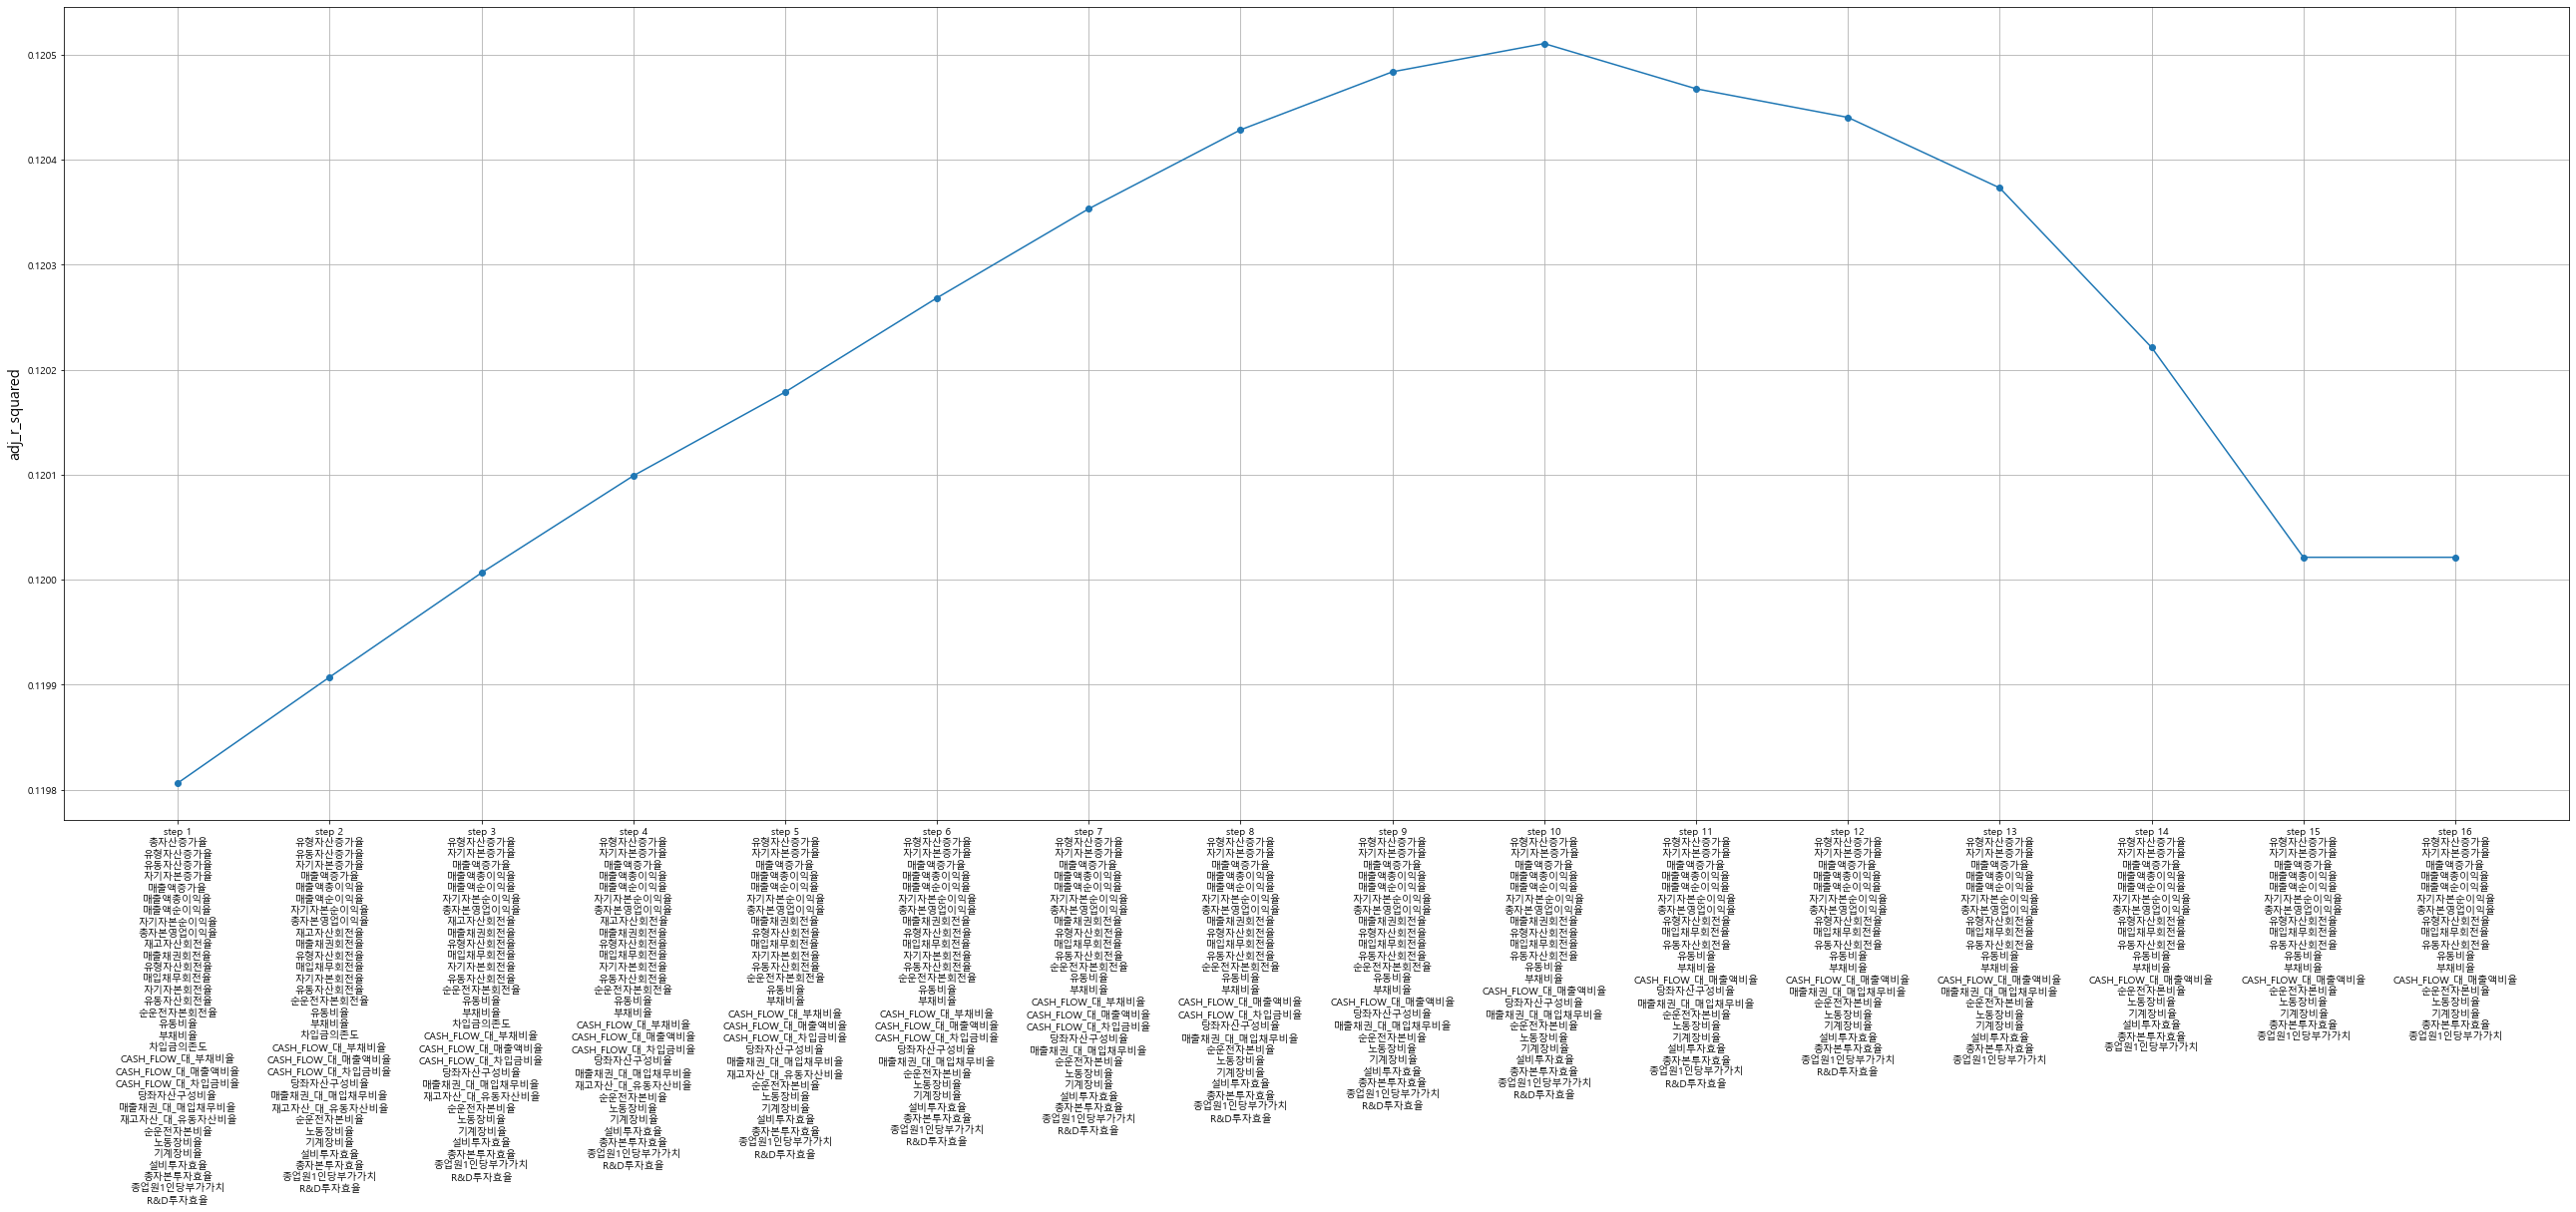

In [48]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())
    print(feature[included].columns)

    
    fig = plt.figure(figsize=(45,15))
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=10)
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(ss_sc2,y)

In [49]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['유형자산증가율', '자기자본증가율', '매출액증가율', '매출액총이익율', '매출액순이익율', '자기자본순이익율',
       '총자본영업이익율', '유형자산회전율', '매입채무회전율', '유동자산회전율', '유동비율', '부채비율',
       'CASH_FLOW_대_매출액비율', '순운전자본비율', '노동장비율', '기계장비율', '총자본투자효율',
       '종업원1인당부가가치']])

,VIF Factor,features
0,3.849354,순운전자본비율
1,3.575242,노동장비율
2,3.498254,자기자본순이익율
3,3.067150,종업원1인당부가가치
4,3.060797,매출액순이익율
5,2.552320,유동비율
6,2.378408,총자본영업이익율
7,2.236573,기계장비율
8,2.201137,총자본투자효율
9,2.060815,부채비율


### 릿지

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit 
from scipy import stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

ridge = Ridge(alpha = 100)
neg_mse_scores = cross_val_score(ridge, ss_sc2, y, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.046 -0.136 -0.178 -0.232 -0.221 -0.186]
 5 folds 의 개별 RMSE scores :  [0.214 0.369 0.421 0.482 0.47  0.432]
 5 folds 의 평균 RMSE : 0.398 


In [51]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 릿지에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
ridge_alpha = [0,1,2,3,4,5]
coeff_lasso_df =get_linear_reg_eval('Ridge', params=ridge_alpha, X_data_n=ss_sc2, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(ridge_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 0.398 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.398 
alpha 2일 때 5 폴드 세트의 평균 RMSE: 0.398 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 0.398 
alpha 4일 때 5 폴드 세트의 평균 RMSE: 0.398 
alpha 5일 때 5 폴드 세트의 평균 RMSE: 0.398 


,alpha:0,alpha:1,alpha:2,alpha:3,alpha:4,alpha:5
총자본영업이익율,0.076794,0.076779,0.076764,0.076749,0.076734,0.076719
자기자본순이익율,0.058524,0.058498,0.058473,0.058447,0.058422,0.058396
유동자산회전율,0.042002,0.041972,0.041941,0.041911,0.041881,0.041851
순운전자본비율,0.030583,0.030538,0.030493,0.030448,0.030403,0.030358
종업원1인당부가가치,0.029728,0.029709,0.029690,0.029670,0.029651,0.029632
CASH_FLOW_대_매출액비율,0.025291,0.025279,0.025266,0.025254,0.025241,0.025229
유형자산회전율,0.024999,0.024998,0.024998,0.024997,0.024997,0.024996
기계장비율,0.023376,0.023369,0.023363,0.023356,0.023349,0.023342
부채비율,0.020397,0.020358,0.020319,0.020280,0.020241,0.020202
매입채무회전율,0.017780,0.017774,0.017767,0.017761,0.017754,0.017748


진짜 릿지는 못 써먹겠다....ㅂㄷㅂㄷ

### 라쏘
- 주요 파라미터 alpha = 라쏘 회귀의 alpha L1 규제 계수
- L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
%matplotlib inline

lasso = Lasso(alpha = 100)
neg_mse_scores = cross_val_score(lasso, ss_sc2, y, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.046 -0.139 -0.188 -0.255 -0.255 -0.226]
 5 folds 의 개별 RMSE scores :  [0.214 0.373 0.433 0.505 0.505 0.476]
 5 folds 의 평균 RMSE : 0.418 


In [56]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.004,0.005,0.006,0.007,0.008]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=ss_sc2, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  Lasso #######
alpha 0.004일 때 5 폴드 세트의 평균 RMSE: 0.385 
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.385 
alpha 0.006일 때 5 폴드 세트의 평균 RMSE: 0.385 
alpha 0.007일 때 5 폴드 세트의 평균 RMSE: 0.385 
alpha 0.008일 때 5 폴드 세트의 평균 RMSE: 0.385 


,alpha:0.004,alpha:0.005,alpha:0.006,alpha:0.007,alpha:0.008
총자본영업이익율,0.073135,0.071721,0.070342,0.068783,0.067150
자기자본순이익율,0.039628,0.037514,0.036803,0.036065,0.034942
유동자산회전율,0.025828,0.024236,0.023139,0.022187,0.021564
유형자산회전율,0.022936,0.021518,0.020276,0.019083,0.017813
CASH_FLOW_대_매출액비율,0.017346,0.016541,0.016954,0.016451,0.016034
종업원1인당부가가치,0.017313,0.016144,0.014938,0.013681,0.012447
기계장비율,0.016456,0.015981,0.015506,0.015189,0.015061
매입채무회전율,0.004477,0.003487,0.002423,0.001277,0.000000
자기자본증가율,0.004111,0.002818,0.001564,0.000311,0.000000
매출액총이익율,0.003934,0.002652,0.001024,0.000000,0.000000


0.005로 선택 했습니다

In [57]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['총자본영업이익율','자기자본순이익율','유동자산회전율','유형자산회전율','CASH_FLOW_대_매출액비율','종업원1인당부가가치',
         '기계장비율','매입채무회전율','자기자본증가율','매출액총이익율','설비투자효율','CASH_FLOW_대_부채비율','차입금의존도',
         '유형자산증가율','유동비율','매출액증가율','총자본투자효율']])

,VIF Factor,features
0,3.099182,CASH_FLOW_대_매출액비율
1,3.095173,CASH_FLOW_대_부채비율
2,2.352496,총자본영업이익율
3,2.291190,총자본투자효율
4,2.070380,자기자본순이익율
5,1.926527,종업원1인당부가가치
6,1.759049,기계장비율
7,1.639780,유동비율
8,1.541509,유동자산회전율
9,1.486443,차입금의존도


12개 선정입니다

### 엘라스틱넷
- L2규제와 L1규제를 결합한 회귀. 비용함수의 목표는 함수식을 최소화 하는 회귀계수(W)를 찾는 것.
- 엘라스틱넷은 라쏘회귀의 성향이 강해 L2규제를 추가한 것. 상대적으로 시간이 오래 걸린다.
- 주요 파라미터 : -alpha(aL1+bL2=L1의 alpha + L2의 alpha) -l1_ratio (a/a+b)

In [58]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LogisticRegressionCV
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = TimeSeriesSplit(n_splits=6))
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
       
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

# 엘라스틱에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
elastic_alpha = [0.005,0.006,0.007,0.008,0.009]
coeff_lasso_df =get_linear_reg_eval('ElasticNet', params=elastic_alpha, X_data_n=ss_sc2, y_target_n=y)

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

#######  ElasticNet #######
alpha 0.005일 때 5 폴드 세트의 평균 RMSE: 0.400 
alpha 0.006일 때 5 폴드 세트의 평균 RMSE: 0.400 
alpha 0.007일 때 5 폴드 세트의 평균 RMSE: 0.400 
alpha 0.008일 때 5 폴드 세트의 평균 RMSE: 0.401 
alpha 0.009일 때 5 폴드 세트의 평균 RMSE: 0.401 


,alpha:0.005,alpha:0.006,alpha:0.007,alpha:0.008,alpha:0.009
총자본영업이익율,0.073552,0.072600,0.071566,0.070594,0.069560
자기자본순이익율,0.041376,0.038881,0.037572,0.037062,0.036578
유동자산회전율,0.026099,0.025429,0.024307,0.023514,0.022753
유형자산회전율,0.023439,0.022605,0.021603,0.020712,0.019864
CASH_FLOW_대_매출액비율,0.018149,0.016942,0.016488,0.016819,0.016881
종업원1인당부가가치,0.017978,0.017010,0.016216,0.015432,0.014561
기계장비율,0.016732,0.016384,0.016037,0.015668,0.015353
매입채무회전율,0.005003,0.004283,0.003579,0.002833,0.002091
자기자본증가율,0.004679,0.003876,0.002969,0.002098,0.001234
매출액총이익율,0.004619,0.003703,0.002809,0.001655,0.000533


0.008로 선정 합니다

In [60]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['총자본영업이익율','자기자본순이익율','유동자산회전율','유형자산회전율','CASH_FLOW_대_매출액비율','종업원1인당부가가치',
         '기계장비율','매입채무회전율','자기자본증가율','매출액총이익율','설비투자효율','CASH_FLOW_대_부채비율','차입금의존도',
         '유형자산증가율','유동비율','매출액증가율','총자본투자효율']])

,VIF Factor,features
0,3.099182,CASH_FLOW_대_매출액비율
1,3.095173,CASH_FLOW_대_부채비율
2,2.352496,총자본영업이익율
3,2.291190,총자본투자효율
4,2.070380,자기자본순이익율
5,1.926527,종업원1인당부가가치
6,1.759049,기계장비율
7,1.639780,유동비율
8,1.541509,유동자산회전율
9,1.486443,차입금의존도


### 교차검증 전 정확도 확인

14개 선정입니다

In [67]:
ss_sc3 = ss_sc2[['자기자본순이익율','종업원1인당부가가치','유동비율','총자본영업이익율','기계장비율','총자본투자효율','CASH_FLOW_대_매출액비율',
                 '유동자산회전율','매출액증가율','매출액총이익율','자기자본증가율','유형자산회전율','유형자산증가율','매입채무회전율']]

### 최종 전체 피쳐 다중공선성 확인

In [68]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(ss_sc3[['자기자본순이익율','종업원1인당부가가치','유동비율','총자본영업이익율','기계장비율','총자본투자효율','CASH_FLOW_대_매출액비율',
                 '유동자산회전율','매출액증가율','매출액총이익율','자기자본증가율','유형자산회전율','유형자산증가율','매입채무회전율']])

,VIF Factor,features
0,2.326378,총자본영업이익율
1,2.032741,자기자본순이익율
2,1.866517,종업원1인당부가가치
3,1.843045,총자본투자효율
4,1.734432,기계장비율
5,1.525101,유동자산회전율
6,1.446043,CASH_FLOW_대_매출액비율
7,1.324313,유동비율
8,1.276536,매출액증가율
9,1.269401,매출액총이익율


#### 최종 전체 피쳐 통계적인 수치 확인하기

In [69]:
shap_pct(ss_sc3)

자기자본순이익율 의 pvalue: 0.0
종업원1인당부가가치 의 pvalue: 0.0
유동비율 의 pvalue: 0.0
총자본영업이익율 의 pvalue: 0.0
기계장비율 의 pvalue: 0.0
총자본투자효율 의 pvalue: 9.010769515147871e-41
CASH_FLOW_대_매출액비율 의 pvalue: 0.0
유동자산회전율 의 pvalue: 0.0
매출액증가율 의 pvalue: 0.0
매출액총이익율 의 pvalue: 0.0
자기자본증가율 의 pvalue: 0.0
유형자산회전율 의 pvalue: 0.0
유형자산증가율 의 pvalue: 0.0
매입채무회전율 의 pvalue: 0.0


#### 최종 피쳐 q-q plot 확인하기

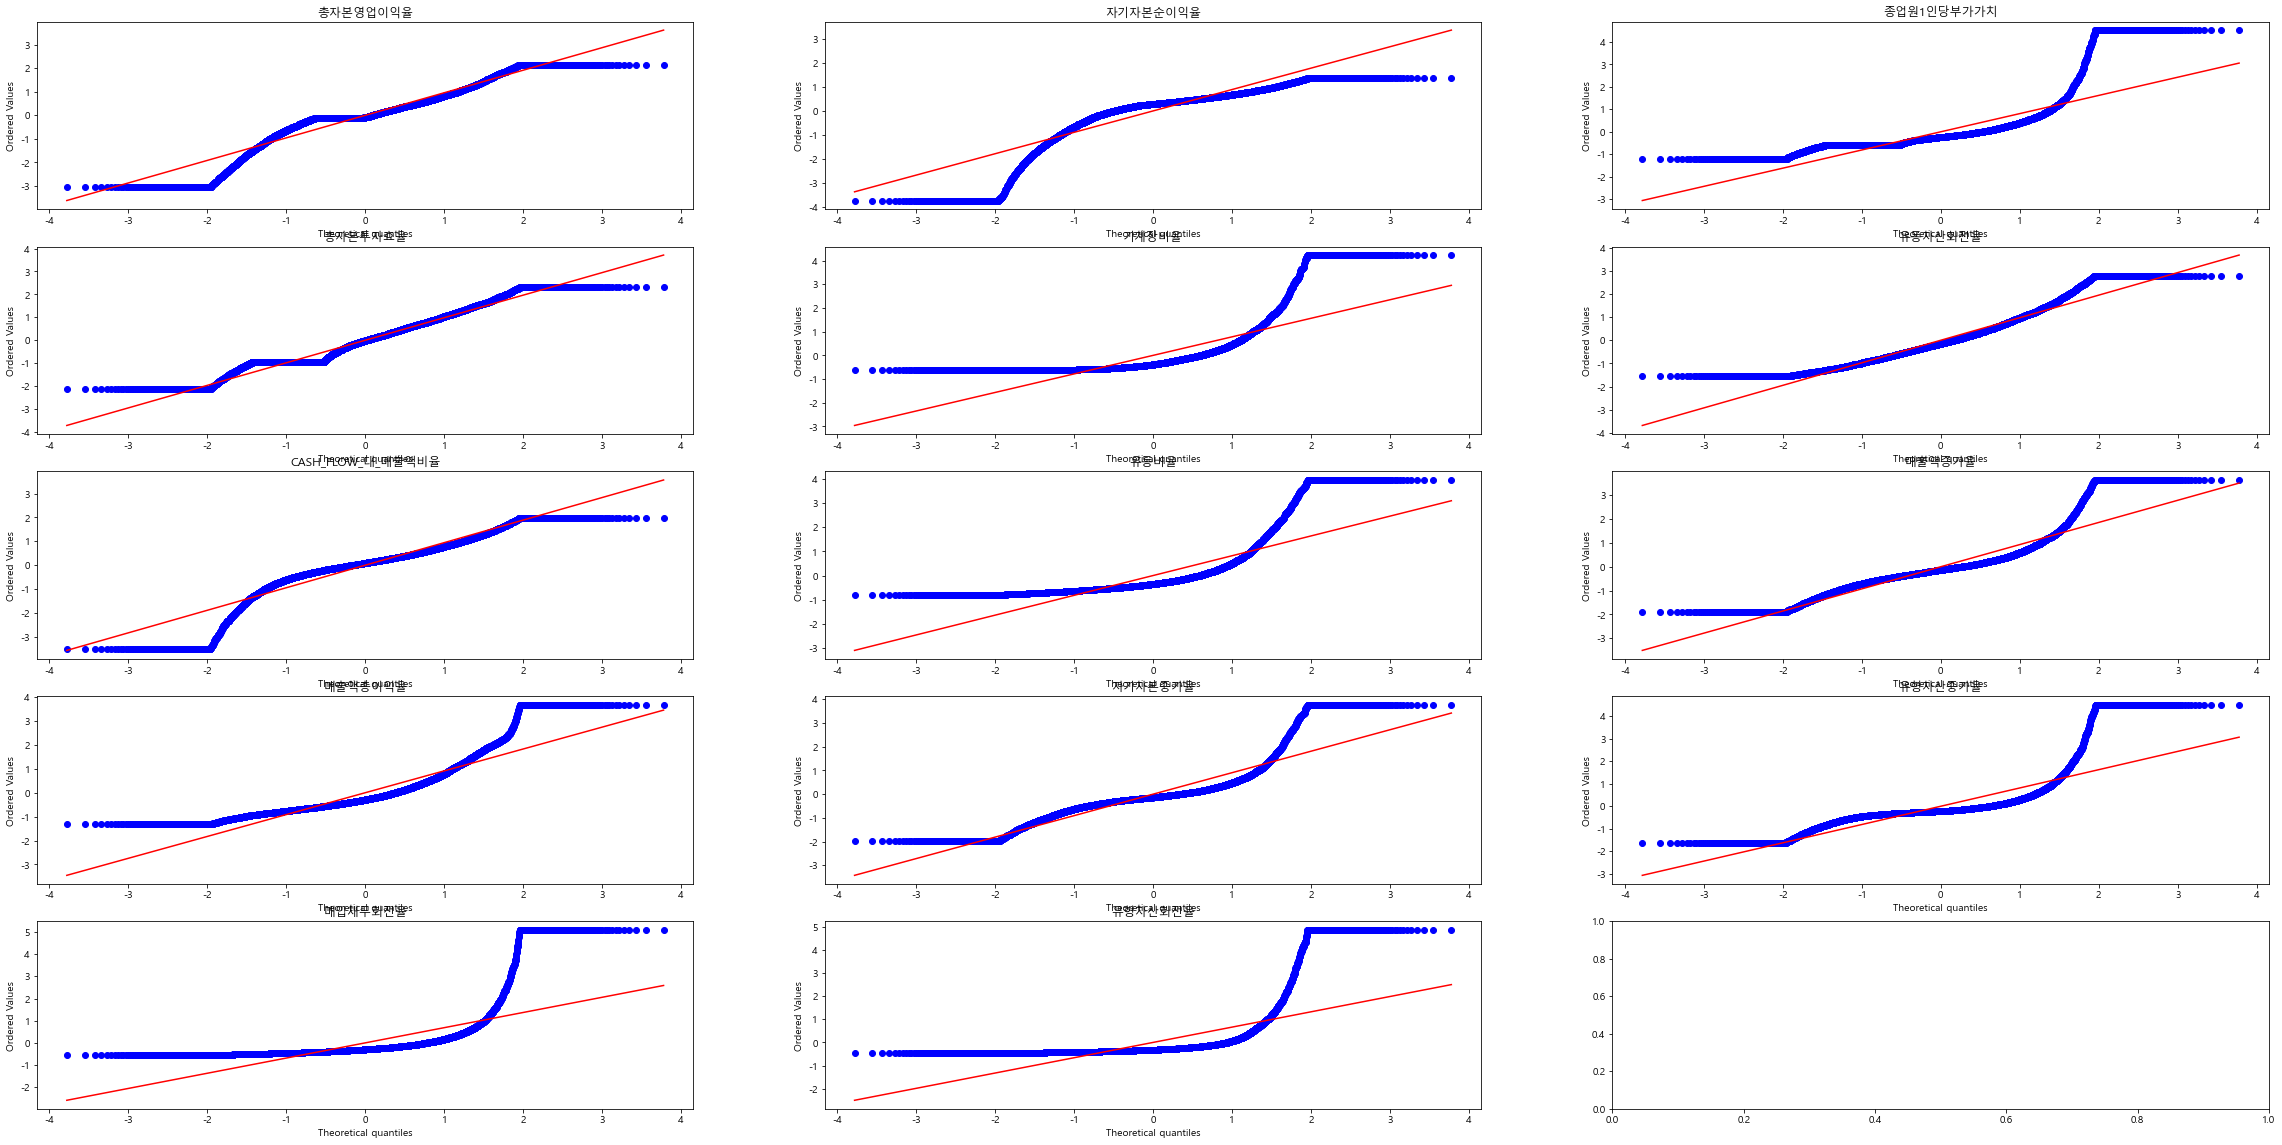

In [70]:
# 정규성 qqplot
# 표준정규분포에서 직선에 가까우면 오차의 정규성 만족
from matplotlib.pyplot import imread
import scipy.stats as stats

fig, axes = plt.subplots(5,3)
fig.set_size_inches((40,20))


stats.probplot(ss_sc3['총자본영업이익율'],dist=stats.norm,plot=axes[0,0])
axes[0,0].title.set_text("총자본영업이익율")
stats.probplot(ss_sc3['자기자본순이익율'],dist=stats.norm,plot=axes[0,1])
axes[0,1].title.set_text("자기자본순이익율")
stats.probplot(ss_sc3['종업원1인당부가가치'],dist=stats.norm,plot=axes[0,2])
axes[0,2].title.set_text("종업원1인당부가가치")
stats.probplot(ss_sc3['총자본투자효율'],dist=stats.norm,plot=axes[1,0])
axes[1,0].title.set_text("총자본투자효율")
stats.probplot(ss_sc3['기계장비율'],dist=stats.norm,plot=axes[1,1])
axes[1,1].title.set_text("기계장비율")
stats.probplot(ss_sc3['유동자산회전율'],dist=stats.norm,plot=axes[1,2])
axes[1,2].title.set_text("유동자산회전율")
stats.probplot(ss_sc3['CASH_FLOW_대_매출액비율'],dist=stats.norm,plot=axes[2,0])
axes[2,0].title.set_text("CASH_FLOW_대_매출액비율")
stats.probplot(ss_sc3['유동비율'],dist=stats.norm,plot=axes[2,1])
axes[2,1].title.set_text("유동비율")
stats.probplot(ss_sc3['매출액증가율'],dist=stats.norm,plot=axes[2,2])
axes[2,2].title.set_text("매출액증가율")
stats.probplot(ss_sc3['매출액총이익율'],dist=stats.norm,plot=axes[3,0])
axes[3,0].title.set_text("매출액총이익율")
stats.probplot(ss_sc3['자기자본증가율'],dist=stats.norm,plot=axes[3,1])
axes[3,1].title.set_text("자기자본증가율")
stats.probplot(ss_sc3['유형자산증가율'],dist=stats.norm,plot=axes[3,2])
axes[3,2].title.set_text("유형자산증가율")
stats.probplot(ss_sc3['매입채무회전율'],dist=stats.norm,plot=axes[4,0])
axes[4,0].title.set_text("매입채무회전율")
stats.probplot(ss_sc3['유형자산회전율'],dist=stats.norm,plot=axes[4,1])
axes[4,1].title.set_text("유형자산회전율")

plt.show()